In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

train_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'Training', color_mode='grayscale', shuffle=True
)
test_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'Testing', color_mode='grayscale', shuffle=False
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(train_gen, epochs=5, validation_data=test_gen)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 489ms/step - accuracy: 0.4751 - loss: 1.7174 - val_accuracy: 0.5457 - val_loss: 1.8037
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 518ms/step - accuracy: 0.8458 - loss: 0.4019 - val_accuracy: 0.6777 - val_loss: 1.4425
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 542ms/step - accuracy: 0.9367 - loss: 0.1923 - val_accuracy: 0.7208 - val_loss: 2.4881
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 61s 678ms/step - accuracy: 0.9685 - loss: 0.0851 - val_accuracy: 0.7284 - val_loss: 2.6111
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 65s 720ms/step - accuracy: 0.9944 - loss: 0.0333 - val_accuracy: 0.7386 - val_loss: 3.1130


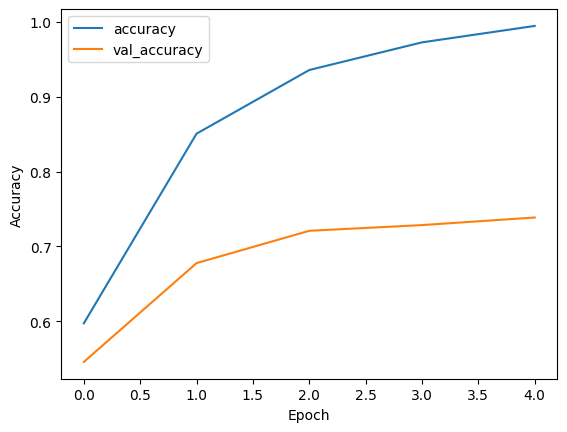

In [8]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
import numpy as np

y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)
print(classification_report(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
              precision    recall  f1-score   support

           0       0.90      0.18      0.30       100
           1       0.69      0.98      0.81       115
           2       0.69      1.00      0.82       105
           3       0.95      0.74      0.83        74

    accuracy                           0.74       394
   macro avg       0.81      0.73      0.69       394
weighted avg       0.79      0.74      0.69       394



13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


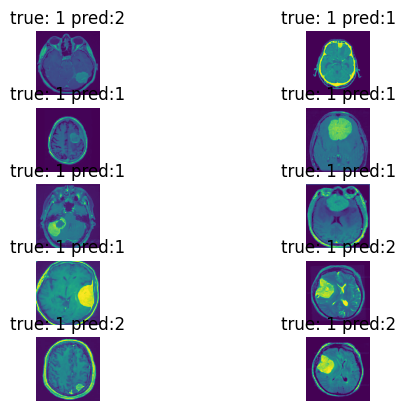

In [19]:
x, y = next(test_gen)
predictions = model.predict(test_gen)
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x[i])
    plt.title(f"true: {np.argmax(y[i])} pred:{np.argmax(predictions[i])}")
    plt.axis('off')